In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data/', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [5]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
b1 = tf.Variable(tf.zeros([256]))
L1 = tf.nn.relu(tf.add(tf.matmul(X, W1), b1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
b2 = tf.Variable(tf.zeros([256]))
L2 = tf.nn.relu(tf.add(tf.matmul(L1, W2), b2))

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
b3 = tf.Variable(tf.zeros([10]))
model = tf.add(tf.matmul(L2, W3), b3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=model, labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

In [6]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [10]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost], 
                               feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val
        
    print("Epoch: {0:04d}".format(epoch+1), 
          "Avg. cost: {:.3f}".format(total_cost / total_batch))

print("Optimization completed!")

Epoch: 0001 Avg. cost: 0.008
Epoch: 0002 Avg. cost: 0.009
Epoch: 0003 Avg. cost: 0.005
Epoch: 0004 Avg. cost: 0.008
Epoch: 0005 Avg. cost: 0.007
Epoch: 0006 Avg. cost: 0.004
Epoch: 0007 Avg. cost: 0.012
Epoch: 0008 Avg. cost: 0.005
Epoch: 0009 Avg. cost: 0.004
Epoch: 0010 Avg. cost: 0.006
Epoch: 0011 Avg. cost: 0.008
Epoch: 0012 Avg. cost: 0.004
Epoch: 0013 Avg. cost: 0.004
Epoch: 0014 Avg. cost: 0.006
Epoch: 0015 Avg. cost: 0.005
Optimization completed!


In [21]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

print("Accuracy: ", sess.run(accuracy, feed_dict={X: mnist.test.images, 
                                                  Y: mnist.test.labels}))

Accuracy:  0.9788


In [30]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
b1 = tf.Variable(tf.zeros([256]))
L1 = tf.nn.relu(tf.add(tf.matmul(X, W1), b1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
b2 = tf.Variable(tf.zeros([256]))
L2 = tf.nn.relu(tf.add(tf.matmul(L1, W2), b2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
b3 = tf.Variable(tf.zeros([10]))
model = tf.add(tf.matmul(L2, W3), b3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=model, labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)


In [31]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [32]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost], 
                               feed_dict={X: batch_xs, Y: batch_ys, 
                                          keep_prob: 0.8})
        total_cost += cost_val
        
    print("Epoch: {0:04d}".format(epoch+1), 
          "Avg. cost: {:.3f}".format(total_cost / total_batch))

print("Optimization completed!")

Epoch: 0001 Avg. cost: 0.423
Epoch: 0002 Avg. cost: 0.162
Epoch: 0003 Avg. cost: 0.116
Epoch: 0004 Avg. cost: 0.089
Epoch: 0005 Avg. cost: 0.073
Epoch: 0006 Avg. cost: 0.060
Epoch: 0007 Avg. cost: 0.053
Epoch: 0008 Avg. cost: 0.045
Epoch: 0009 Avg. cost: 0.043
Epoch: 0010 Avg. cost: 0.037
Epoch: 0011 Avg. cost: 0.034
Epoch: 0012 Avg. cost: 0.032
Epoch: 0013 Avg. cost: 0.029
Epoch: 0014 Avg. cost: 0.029
Epoch: 0015 Avg. cost: 0.026
Epoch: 0016 Avg. cost: 0.023
Epoch: 0017 Avg. cost: 0.023
Epoch: 0018 Avg. cost: 0.022
Epoch: 0019 Avg. cost: 0.020
Epoch: 0020 Avg. cost: 0.023
Epoch: 0021 Avg. cost: 0.019
Epoch: 0022 Avg. cost: 0.020
Epoch: 0023 Avg. cost: 0.019
Epoch: 0024 Avg. cost: 0.018
Epoch: 0025 Avg. cost: 0.017
Epoch: 0026 Avg. cost: 0.018
Epoch: 0027 Avg. cost: 0.015
Epoch: 0028 Avg. cost: 0.017
Epoch: 0029 Avg. cost: 0.016
Epoch: 0030 Avg. cost: 0.014
Optimization completed!


In [33]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

print("Accuracy: ", sess.run(accuracy, feed_dict={X: mnist.test.images, 
                                                  Y: mnist.test.labels, 
                                                  keep_prob: 1}))

Accuracy:  0.9808


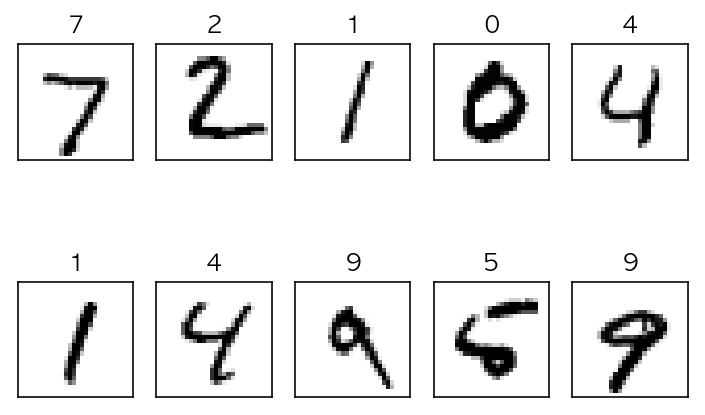

In [35]:
import matplotlib.pyplot as plt

labels = sess.run(model, feed_dict={X: mnist.test.images, 
                                    Y: mnist.test.labels, 
                                    keep_prob: 1})

fig = plt.figure()

for i in range(10):
    subplot = fig.add_subplot(2, 5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title("{}".format(np.argmax(labels[i])))
    subplot.imshow(mnist.test.images[i].reshape((28,28)), cmap=plt.cm.gray_r)
plt.show()